In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [18]:
from util import PROJECTS_FILE, FILTERED_FILE
#reads projects from Excel file
df = pd.read_excel(PROJECTS_FILE, keep_default_na=False)
len(df)

21149

In [19]:
df = df[df.contributors >= 10]
df = df[df.commits >= 1000]
len(df)

6708

In [21]:
df = df[df.primaryLanguage == 'Java']
df.createdAt = pd.to_datetime(df.createdAt).dt.tz_localize(None) 
df.pushedAt = pd.to_datetime(df.pushedAt).dt.tz_localize(None)
df.to_excel(FILTERED_FILE, index=False)
len(df)


633

In [6]:
df.primaryLanguage.value_counts()

JavaScript          89
Python              59
C++                 57
Java                45
Go                  41
C                   31
TypeScript          26
PHP                 24
Ruby                22
C#                  20
Scala                7
HTML                 6
Objective-C          5
Shell                5
Rust                 4
Swift                4
Haskell              3
OCaml                3
Kotlin               3
Lua                  2
PowerShell           2
Vim script           2
Clojure              2
CSS                  2
Elixir               2
Jupyter Notebook     2
CoffeeScript         2
Objective-C++        2
Erlang               2
Common Lisp          1
Vue                  1
CMake                1
Nim                  1
Dart                 1
Groovy               1
Smarty               1
Julia                1
Crystal              1
Emacs Lisp           1
Rich Text Format     1
Name: primaryLanguage, dtype: int64

In [7]:
len(df.primaryLanguage.value_counts())

40

In [8]:
#filters repositories by language, keeping just the ones that use the top 10 languages in the corpus 
df = df.groupby('primaryLanguage').filter(lambda x: len(x) >= 18)
len(df)

414

In [9]:
pd.set_option('display.max_colwidth', -1) 
df

<ipython-input-9-b5e758cfd264>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,owner,name,createdAt,pushedAt,isMirror,diskUsage,primaryLanguage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases,description
0,freeCodeCamp,freeCodeCamp,2014-12-24 17:49:19,2019-08-23 13:48:29,False,120280,JavaScript,5,996,8383,304423,22449,13741,24656,22500,6,0,0,The https://www.freeCodeCamp.org open source codebase and curriculum. Learn to code for free together with millions of people.
3,twbs,bootstrap,2011-07-29 21:19:00,2019-08-23 12:35:17,False,145750,JavaScript,5,988,7265,135371,66643,18719,18958,10050,59,55,55,"The most popular HTML, CSS, and JavaScript framework for developing responsive, mobile first projects on the web."
4,facebook,react,2013-05-24 16:15:54,2019-08-23 14:09:34,False,147938,JavaScript,10,985,6636,134903,25207,7928,11258,8460,33,118,83,"A declarative, efficient, and flexible JavaScript library for building user interfaces."
5,tensorflow,tensorflow,2015-11-07 01:19:20,2019-08-23 13:37:24,False,386573,C++,26,893,8590,132956,76901,19678,63455,12079,36,88,84,An Open Source Machine Learning Framework for Everyone
15,microsoft,vscode,2015-09-03 20:23:38,2019-08-23 15:18:17,False,211225,TypeScript,34,979,2790,81710,11626,73188,53599,5735,339,134,0,Visual Studio Code
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,WordPress,gutenberg,2017-02-03 19:34:19,2019-08-23 14:06:16,False,92587,JavaScript,5,497,326,5083,1527,9023,10412,8088,462,1194,69,The Block Editor project for WordPress and beyond. Plugin is available from the official repository.
3201,cucumber,cucumber-ruby,2008-04-17 18:19:13,2019-08-19 14:08:00,False,11904,Ruby,3,356,252,5017,1099,672,7467,687,25,244,0,Cucumber for Ruby
3205,yugabyte,yugabyte-db,2017-10-05 21:56:00,2021-03-27 01:24:12,False,204686,C,29,178,200,5013,552,6695,9699,1136,37,58,50,"The high-performance distributed SQL database for global, internet-scale apps."
3207,opencart,opencart,2011-08-02 07:32:17,2019-08-23 07:16:51,False,79952,PHP,7,286,652,5012,3812,4583,9383,2951,6,41,22,A free shopping cart system. OpenCart is an open source PHP-based online e-commerce solution.


In [10]:
df.describe()

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases
count,4.140000e+02,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2.395509e+05,9.497585,445.388889,883.509662,17317.710145,4497.804348,4816.289855,23629.340580,4866.640097,93.253623,282.971014,68.519324
std,4.090451e+05,6.746804,353.899756,1035.014832,22139.798648,6799.739246,6242.417050,61975.858553,6884.742633,526.187379,929.913695,165.989347
min,5.500000e+03,1.000000,10.000000,30.000000,5009.000000,205.000000,0.000000,5008.000000,32.000000,1.000000,0.000000,0.000000
25%,4.514750e+04,5.000000,172.250000,349.250000,6842.250000,1449.750000,1467.500000,6816.750000,1133.750000,7.000000,58.000000,1.000000
50%,9.867800e+04,8.000000,336.500000,546.000000,10231.000000,2516.000000,3126.000000,10106.500000,2641.000000,18.500000,115.000000,30.000000
75%,2.203118e+05,12.000000,654.000000,1018.500000,18449.750000,4855.000000,5975.000000,22325.500000,5725.000000,47.750000,237.500000,81.000000
max,3.211777e+06,62.000000,2978.000000,8590.000000,304423.000000,76901.000000,73188.000000,856933.000000,63017.000000,9989.000000,15004.000000,2781.000000


In [11]:
#saves filtered projetcts to Excel
#removes timezone from dates, since Excel does not know how to handle that
df.createdAt = pd.to_datetime(df.createdAt).dt.tz_localize(None) 
df.pushedAt = pd.to_datetime(df.pushedAt).dt.tz_localize(None)
df.to_excel(FILTERED_FILE, index=False)

<AxesSubplot:ylabel='primaryLanguage'>

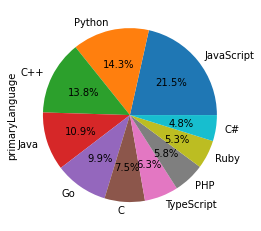

In [12]:
df.primaryLanguage.value_counts().plot(kind='pie', autopct='%1.1f%%')

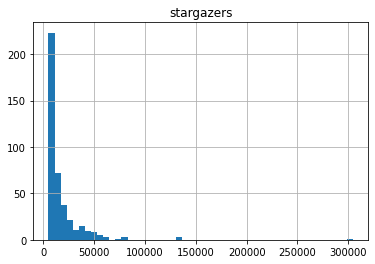

In [13]:
hist = df.hist(column=['stargazers'], bins=50)

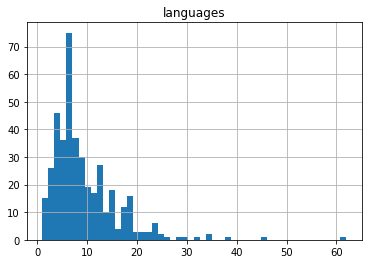

In [14]:
hist = df.hist(column=['languages'], bins=50)

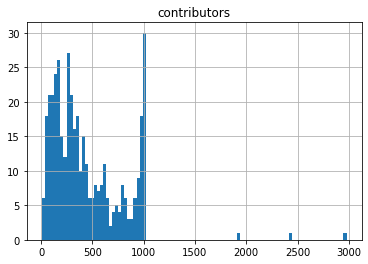

In [15]:
hist = df.hist(column=['contributors'], bins=100)

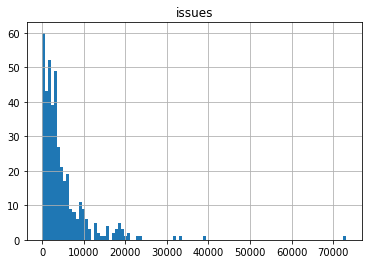

In [16]:
hist = df.hist(column=['issues'], bins=100)

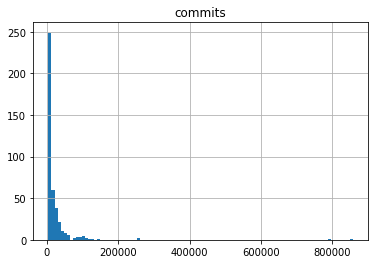

In [17]:
hist = df.hist(column=['commits'], bins=100)

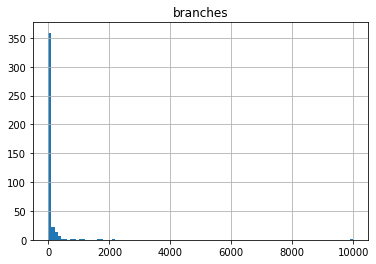

In [18]:
hist = df.hist(column=['branches'], bins=100)

Text(0.5, 0, 'KB')

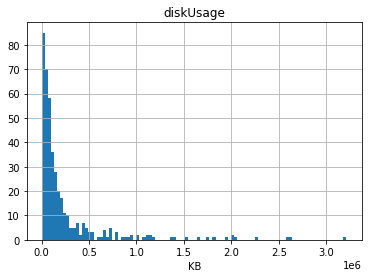

In [19]:
hist = df.hist(column=['diskUsage'], bins=100)
plt.xlabel("KB")

In [20]:
corr = df.drop('isMirror', axis=1).corr()
corr.style.background_gradient(cmap='Reds')

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases
diskUsage,1.000000,0.343364,0.104175,0.130496,0.019917,0.105862,0.075007,0.548010,0.160330,0.101060,0.083656,-0.018748
languages,0.343364,1.000000,0.170502,0.111063,0.009729,0.105123,0.138460,0.277809,0.119418,0.081429,-0.006954,-0.118581
contributors,0.104175,0.170502,1.000000,0.334654,0.320096,0.387482,0.460408,0.247180,0.498157,0.009565,0.032297,0.086217
watchers,0.130496,0.111063,0.334654,1.000000,0.873616,0.863674,0.385570,0.230780,0.253699,0.010750,0.000154,-0.009170
stargazers,0.019917,0.009729,0.320096,0.873616,1.000000,0.696997,0.389105,0.101144,0.249230,0.004055,0.016743,0.037958
forks,0.105862,0.105123,0.387482,0.863674,0.696997,1.000000,0.362923,0.173540,0.314118,-0.017395,-0.015002,0.000738
issues,0.075007,0.138460,0.460408,0.385570,0.389105,0.362923,1.000000,0.052629,0.435299,-0.004939,-0.016662,0.106261
commits,0.548010,0.277809,0.247180,0.230780,0.101144,0.173540,0.052629,1.000000,0.160716,0.047659,0.044501,-0.048149
pullRequests,0.160330,0.119418,0.498157,0.253699,0.249230,0.314118,0.435299,0.160716,1.000000,0.006551,0.001958,0.061977
branches,0.101060,0.081429,0.009565,0.010750,0.004055,-0.017395,-0.004939,0.047659,0.006551,1.000000,0.745470,-0.031659
